<a href="https://colab.research.google.com/github/Godwin-Anku/MNIST-Multilayer-Perceptron-/blob/main/Multilayer_Perceptron_Network%2C_MLPs_(MNIST_Handwritten_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [ ]:
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]
y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

In [ ]:
print(f'X-Training dataset dimensions: {X_train.shape}')
print(f'X-Validation dataset dimensions: {X_valid.shape}')
print(f'X-Testing dataset dimensions: {X_test.shape}')

X-Training dataset dimensions: (50000, 28, 28)
X-Validation dataset dimensions: (10000, 28, 28)
X-Testing dataset dimensions: (10000, 28, 28)


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254,
        255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0:9]

array([3, 8, 7, 9, 9, 0, 1, 1, 5], dtype=uint8)

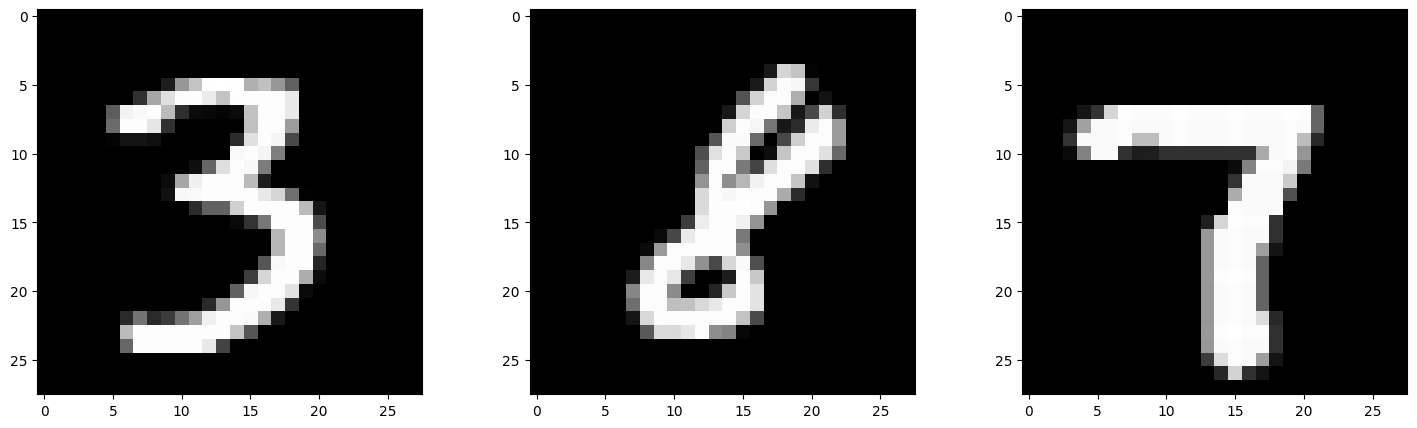

In [ ]:
plt.figure(figsize = (18, 5))
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.axis(True)
  plt.imshow(X_train[i], cmap = 'gray')
  plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

In [ ]:
X_train.shape[0]

50000

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255
X_valid = X_valid.reshape(X_valid.shape[0], 28 * 28)
X_valid = X_valid.astype('float32') / 255

In [ ]:
X_train.shape

(50000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
X_valid.shape

(10000, 784)

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
((X_train_fashion, y_train_fashion), (X_valid_fashion, y_valid_fashion)) = fashion_mnist.load_data()

In [ ]:
X_train_fashion

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train_fashion.shape

(60000, 28, 28)

In [ ]:
X_valid_fashion

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train_fashion[0:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

In [ ]:
y_valid_fashion

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_train_fashion.shape

(60000,)

In [ ]:
#The labels in the Fashion MNIST dataset are encoded as integers
print(y_train_fashion[0:9])

[9 0 0 3 0 2 7 2 5]


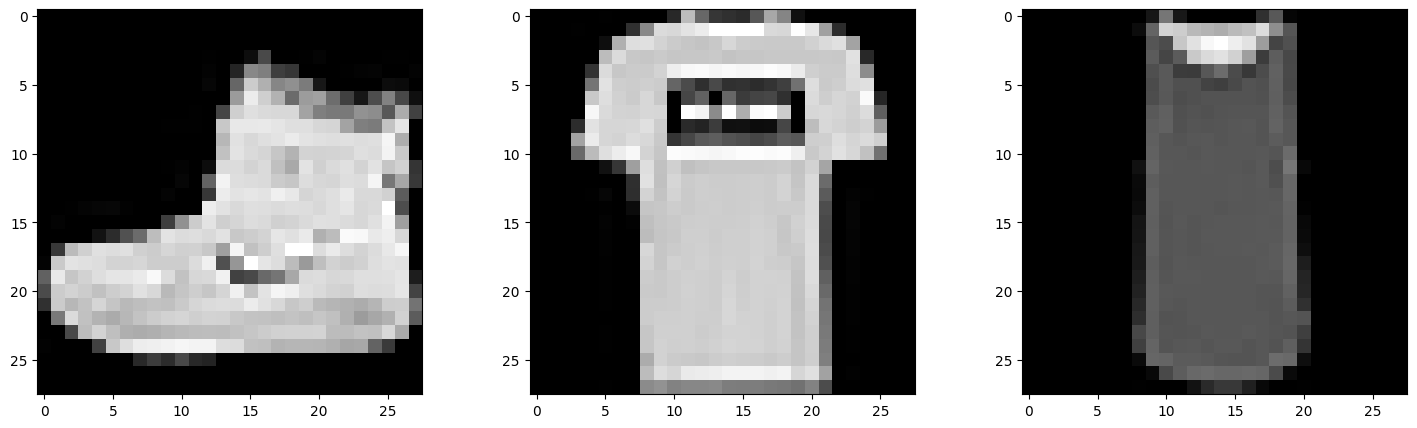

In [ ]:
plt.figure(figsize = (18, 5))
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.axis(True)
  plt.imshow(X_train_fashion[i], cmap = 'gray')
  plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

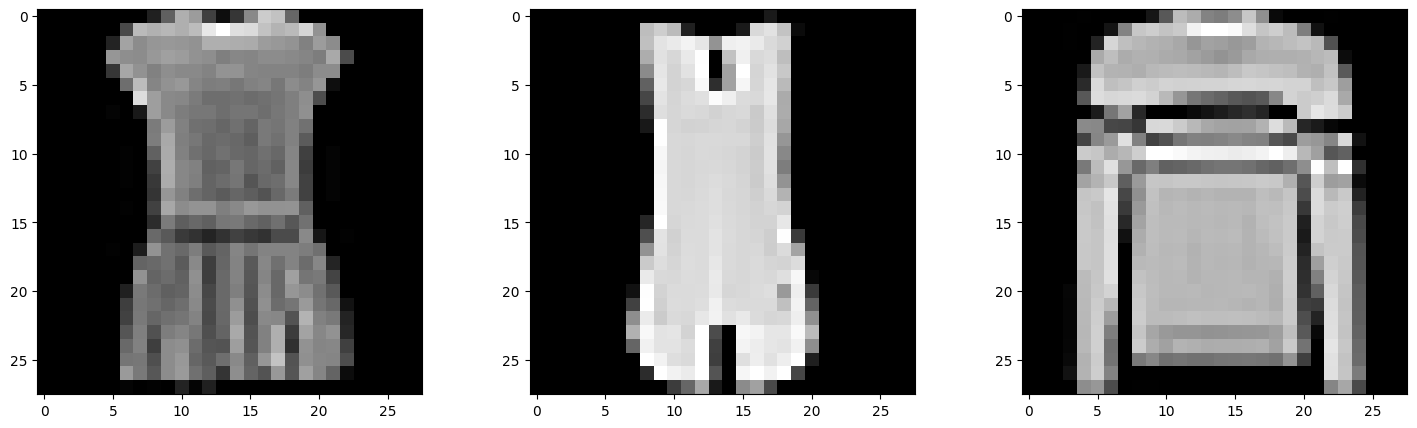

In [ ]:
plt.figure(figsize = (18, 5))
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.axis(True)
  plt.imshow(X_train_fashion[i+3], cmap = 'gray')
  plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

In [ ]:
y_train_onehot = to_categorical(y_train_fashion[0:9])
print(y_train_onehot)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
#Convert integer labels to one_hot encoded vectors
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [ ]:
y_train[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1], )))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

In [ ]:
training_results = model.fit(X_train, y_train, epochs = 21, batch_size = 64, validation_data = (X_valid, y_valid));

Epoch 1/21
782/782 [==============================] - 10s 5ms/step - loss: 0.2833 - accuracy: 0.9173 - val_loss: 0.1755 - val_accuracy: 0.9450
Epoch 2/21
782/782 [==============================] - 3s 4ms/step - loss: 0.1203 - accuracy: 0.9634 - val_loss: 0.1276 - val_accuracy: 0.9622
Epoch 3/21
782/782 [==============================] - 3s 4ms/step - loss: 0.0836 - accuracy: 0.9737 - val_loss: 0.1337 - val_accuracy: 0.9603
Epoch 4/21
782/782 [==============================] - 3s 4ms/step - loss: 0.0632 - accuracy: 0.9799 - val_loss: 0.0901 - val_accuracy: 0.9752
Epoch 5/21
782/782 [==============================] - 4s 5ms/step - loss: 0.0495 - accuracy: 0.9849 - val_loss: 0.1014 - val_accuracy: 0.9745
Epoch 6/21
782/782 [==============================] - 3s 4ms/step - loss: 0.0398 - accuracy: 0.9878 - val_loss: 0.0933 - val_accuracy: 0.9745
Epoch 7/21
782/782 [==============================] - 3s 4ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0954 - val_accuracy: 0.9764
Epoch

In [ ]:
training_results.history['loss']

[0.2833332121372223,
 0.12025860697031021,
 0.08343487977981567,
 0.0626739040017128,
 0.04844509810209274,
 0.04004338011145592,
 0.031984779983758926,
 0.025873057544231415,
 0.021710483357310295,
 0.017882419750094414,
 0.015207269228994846,
 0.011317258700728416,
 0.010982215404510498,
 0.009824502281844616,
 0.008453601971268654,
 0.006820234935730696,
 0.00559252267703414,
 0.005211445968598127,
 0.0037628451827913523,
 0.0031292352359741926,
 0.0024892918299883604]

In [ ]:
len(training_results.history['loss'])

21

In [ ]:
def plot_results(metrics, title = None, ylabel = None, ylim = None, metric_name = None, color = None, xlim = None):
    fig, ax = plt.subplots(figsize = (15, 6))
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
      metrics = [metrics,]
      metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
      ax.plot(metric, color = color[idx])

    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim(xlim)
    plt.ylim(ylim)

    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

In [ ]:
train_loss = training_results.history['loss']
train_acc = training_results.history['accuracy']
valid_loss = training_results.history['val_loss']
valid_acc = training_results.history['val_accuracy']

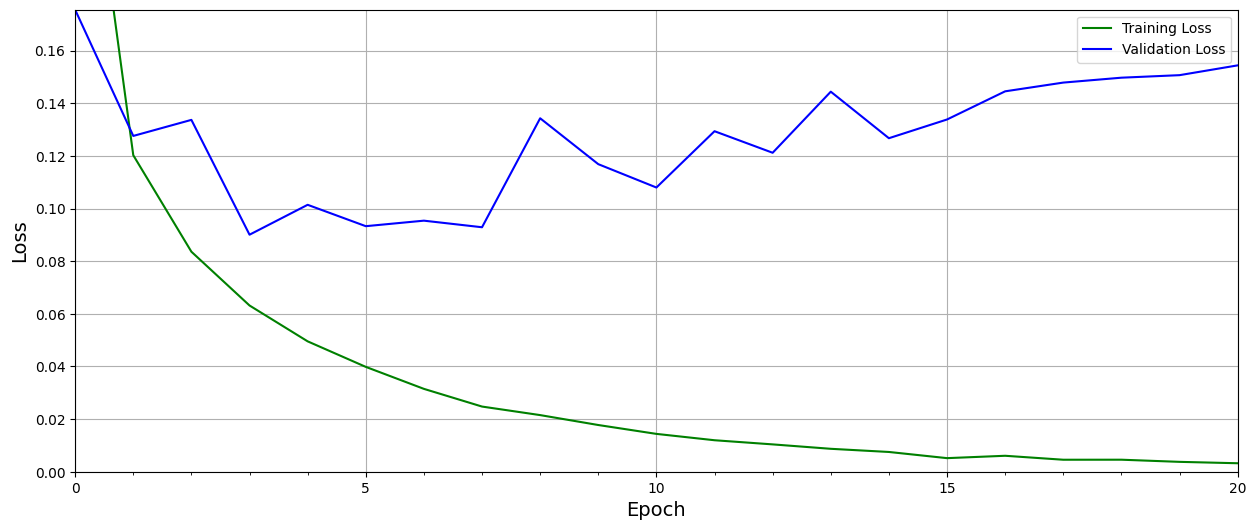

In [ ]:
plot_results(metrics = [train_loss, valid_loss], ylabel = 'Loss', ylim = [0.0, max(valid_loss)], metric_name = ['Training Loss', 'Validation Loss'], color = ['g', 'b'], xlim = [0, len(train_loss)-1])

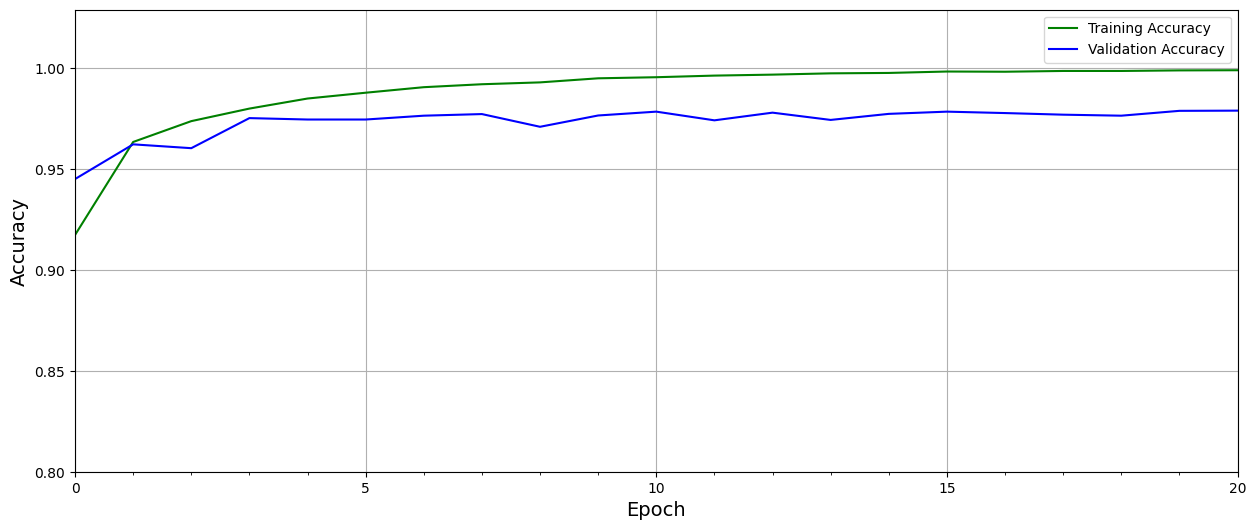

In [ ]:
plot_results(metrics = [train_acc, valid_acc], ylabel = 'Accuracy', ylim = [0.8, max(valid_acc)+0.05], metric_name = ['Training Accuracy', 'Validation Accuracy'], color = ['g', 'b'], xlim = [0, len(train_acc)-1])

In [ ]:
predictions = model.predict(X_test)
predictions[:5]

313/313 [==============================] - 2s 5ms/step


array([[8.9399423e-22, 4.2705800e-19, 1.1788884e-11, 7.1624911e-13,
        1.2066199e-25, 7.1926823e-23, 1.9947744e-26, 1.0000000e+00,
        1.9274534e-24, 9.5548514e-16],
       [2.0847769e-21, 1.4543518e-17, 1.0000000e+00, 2.1964464e-18,
        3.0322282e-32, 3.3160648e-25, 2.8861585e-20, 8.9279189e-28,
        1.4831388e-16, 4.0131629e-30],
       [3.5239813e-18, 9.9998760e-01, 4.6452292e-10, 6.6355866e-12,
        3.7181626e-11, 7.6144447e-12, 4.5819859e-10, 3.1565452e-07,
        1.2002315e-05, 1.8738535e-12],
       [1.0000000e+00, 2.2395290e-25, 3.4315093e-18, 1.9032648e-21,
        2.7951977e-26, 6.7719470e-22, 2.4849592e-21, 9.5978335e-19,
        3.3875086e-26, 2.4034503e-19],
       [1.7380098e-15, 2.8512072e-17, 2.8931948e-15, 4.5506632e-22,
        9.9999869e-01, 1.3627458e-20, 7.0909783e-14, 9.2785543e-11,
        2.0136506e-16, 1.3020405e-06]], dtype=float32)

In [ ]:
index = 100
print(f'Ground Truth for test digit: {np.argmax(y_test[index])}')
print('\n')
print(f'Predictions for each class:\n')
for i in range(10):
  print(f'digit: {i}\t\tProbability: {predictions[index][i]}')

Ground Truth for test digit: 6


Predictions for each class:

digit: 0		Probability: 4.479137687477077e-17
digit: 1		Probability: 2.3567619653728856e-22
digit: 2		Probability: 5.2936727886941624e-21
digit: 3		Probability: 7.733760586895891e-26
digit: 4		Probability: 8.72017485292067e-20
digit: 5		Probability: 1.2435960193481893e-13
digit: 6		Probability: 1.0
digit: 7		Probability: 3.8064436873467008e-25
digit: 8		Probability: 1.2202986949772216e-17
digit: 9		Probability: 6.0824646318299796e-27


In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([8.9399423e-22, 4.2705800e-19, 1.1788884e-11, 7.1624911e-13,
       1.2066199e-25, 7.1926823e-23, 1.9947744e-26, 1.0000000e+00,
       1.9274534e-24, 9.5548514e-16], dtype=float32)

In [ ]:
predicted_labels = [np.argmax(i) for i in predictions]

In [ ]:
predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [ ]:
y_test_integer_labels = tf.argmax(y_test, axis = 1)
y_test_integer_labels

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test_integer_labels, predictions = predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    1,    0,    0,    0,    0,    1,    3,    0],
       [   0, 1115,    1,    1,    0,    1,    4,    1,   12,    0],
       [   2,    2, 1006,    3,    1,    0,    2,    6,   10,    0],
       [   0,    0,    3,  988,    0,    4,    0,    5,    5,    5],
       [   0,    0,    3,    0,  952,    0,    9,    2,    0,   16],
       [   2,    0,    0,    8,    2,  869,    5,    0,    4,    2],
       [   2,    1,    1,    0,    5,    6,  940,    0,    2,    1],
       [   1,    1,   10,    2,    1,    0,    0, 1006,    2,    5],
       [   3,    0,    4,    1,    2,    0,    5,    5,  952,    2],
       [   1,    3,    0,    4,    6,    3,    1,    5,    2,  984]],
      dtype=int32)>

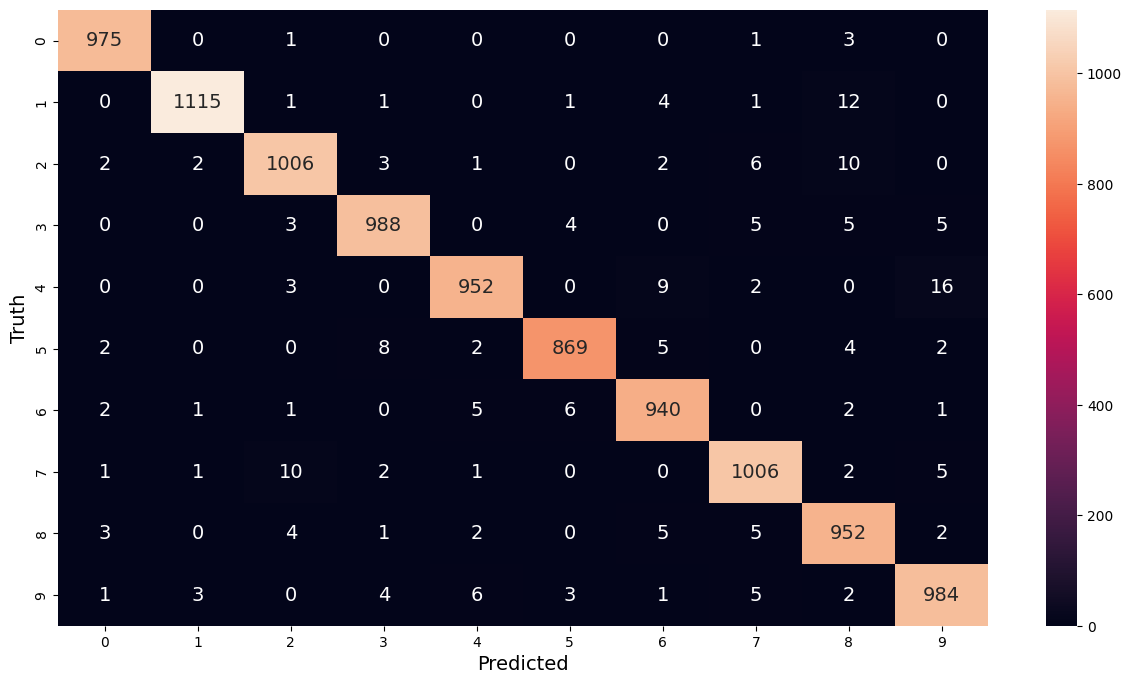

In [ ]:
import seaborn as sns

plt.figure(figsize = (15, 8))
sns.heatmap(cm, annot = True, fmt = 'd', annot_kws = {'size': 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()